İşlem Başarılı!


/tmp/ipython-input-449505381.py:108: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='channel', y='revenue', hue='promotion', ci=None)


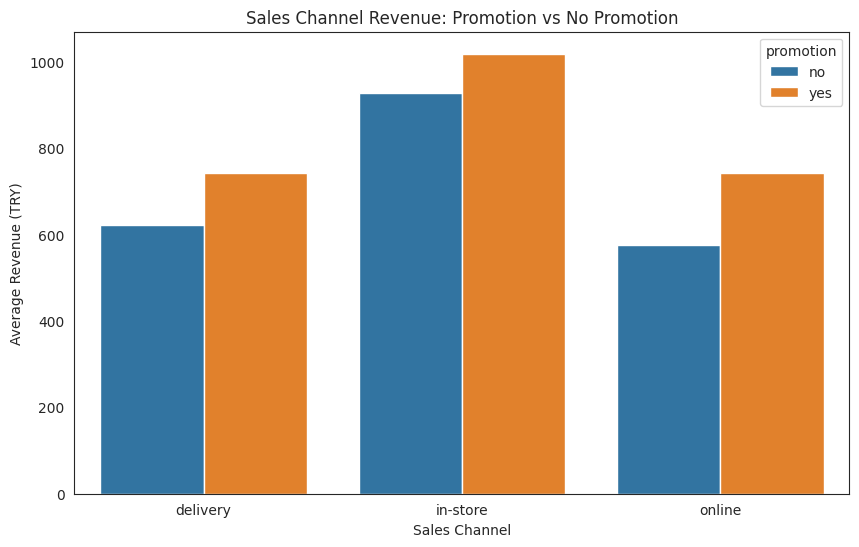

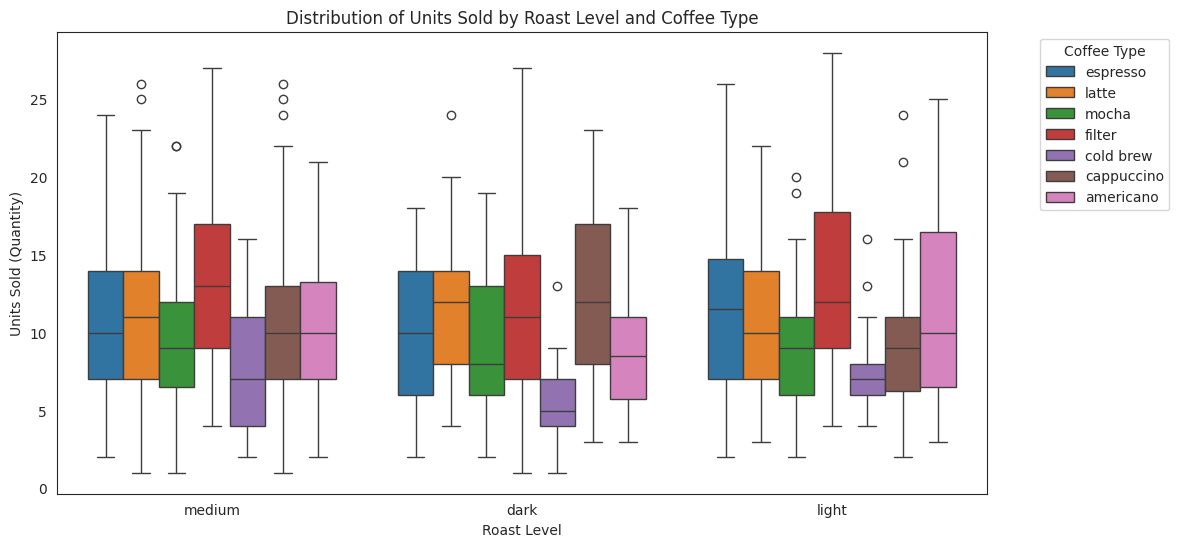

/tmp/ipython-input-449505381.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


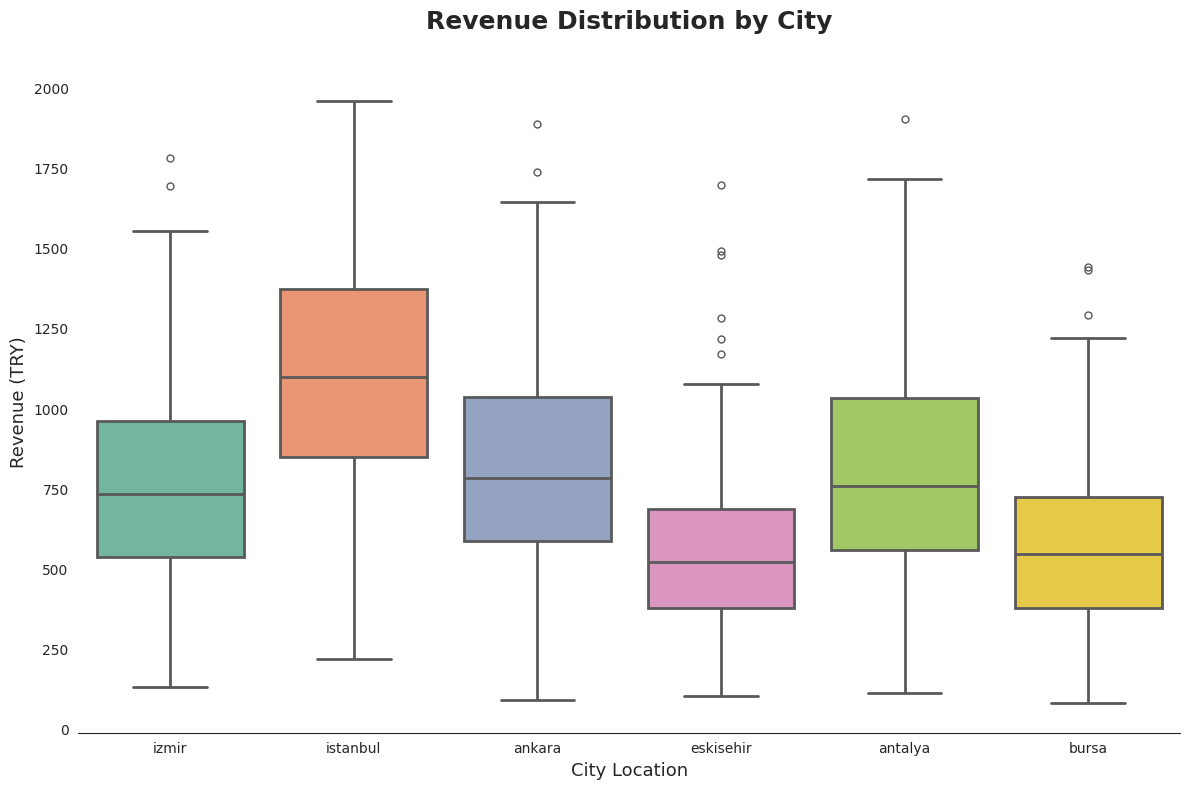

Minimalist Box Plot generated successfully.


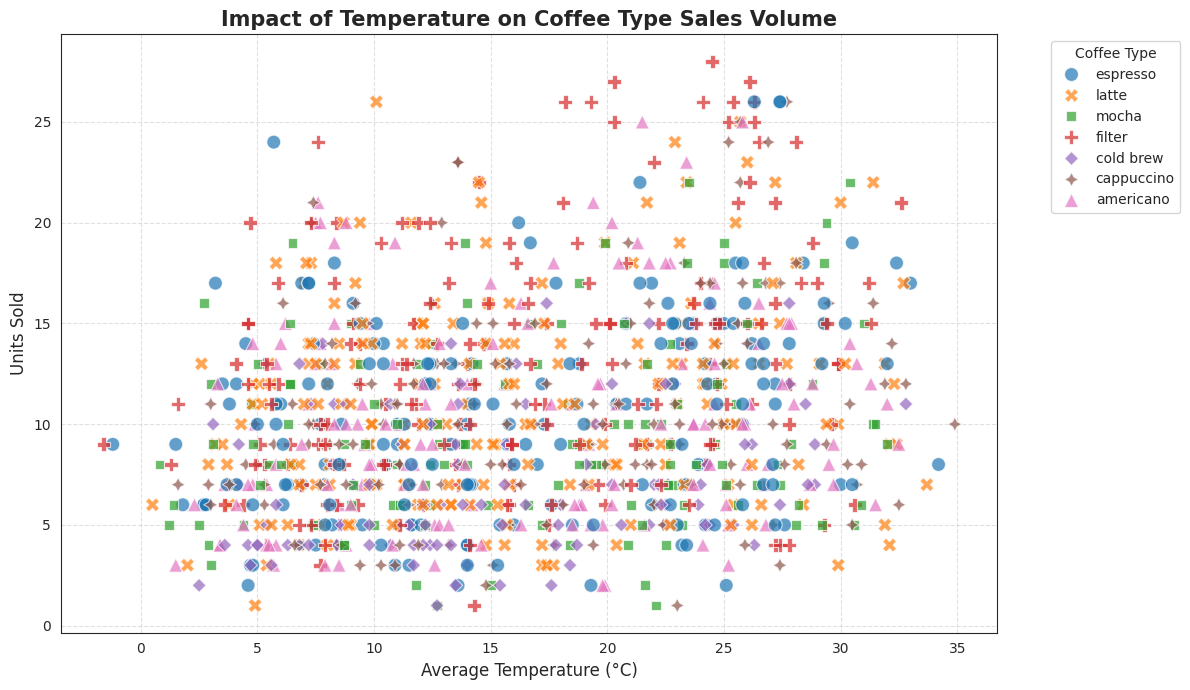

Temperature Analysis Scatter Plot generated successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# --- 1. VERİ YÜKLEME ---
df = pd.read_csv('coffee_sales_dirty.csv')

# --- 2. SÜTUN İSİMLERİ
df = df.rename(columns={
    'month ': 'month',
    'Store location': 'location',
    'sales_Channel': 'channel',
    'Coffee type': 'coffee_type',
    'roastLEVEL': 'roast_level',
    'Promo-Flag': 'promotion',
    'unitprice_try': 'price',
    'Units sold': 'units_sold',
    'discountRate': 'discount_rate',
    'CostPerUnit_TRY': 'cost',
    'customer_footFall': 'footfall',
    'AvgTemp(C)': 'temp',
    'TOTAL_revenue_try': 'revenue'
})

# --- 3. TEMEL TEMİZLİK ---
df = df.drop_duplicates()
df['revenue'] = df['revenue'].astype(str).str.replace(' TRY', '', regex=False)
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['units_sold'] = pd.to_numeric(df['units_sold'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna()

# --- 4. KATEGORİ STANDARTLAŞTIRMA ---
# Küçük harf ve boşluk temizliği
categorical_cols = ['month', 'location', 'channel', 'coffee_type', 'promotion', 'roast_level']
for col in categorical_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()

# Diğer düzeltmeler
duzeltmeler = {
    # Şehirler
    'ankra': 'ankara', 'ankara~': 'ankara', 'ankara!': 'ankara',
    'izmri': 'izmir', 'izmir!': 'izmir', 'izmir*': 'izmir',
    'bursaa': 'bursa', 'bursa*': 'bursa',
    'istanb ul': 'istanbul', 'istanbul#': 'istanbul', 'istanbul!': 'istanbul',
    'eskişehir': 'eskisehir',
    'antalya~': 'antalya', 'antalya#': 'antalya', 'antalya!': 'antalya', 'antalya*': 'antalya',

    # Kanallar
    'onl1ne': 'online', 'online!': 'online', 'online#': 'online',
    'delivary': 'delivery', 'delivery#': 'delivery', 'delivery~': 'delivery', 'delivery!': 'delivery', 'delivery*': 'delivery',
    'in store': 'in-store', 'in-store#': 'in-store', 'in-store~': 'in-store', 'in-store!': 'in-store', 'in-store*': 'in-store',

    # Diğer Hatalar (Roast, Kahveler ve Promosyonlar)
    'meduim': 'medium', 'l1ght': 'light', 'd@rk': 'dark', 'dark!': 'dark', 'medium~': 'medium',
    'no#': 'no', 'no!': 'no', 'no~': 'no', 'no*': 'no', 'yes!': 'yes', 'yes#': 'yes', 'yes~': 'yes',
    'espreso': 'espresso', 'coldbrew': 'cold brew', 'capuccino': 'cappuccino', 'americanno': 'americano',
    'americano#': 'americano', 'latte~': 'latte'
}

df = df.replace(duzeltmeler)

# Kalan tüm sembolleri ( *, !, ~, # ) kökten temizleyelim
for col in categorical_cols:
    for symbol in ['*', '!', '~', '#']:
        df[col] = df[col].str.replace(symbol, '', regex=False)

# --- MISSING VALUES  ---
# Eksik veri yüzdesini hesaplıyoruz
missing_pct = df.isnull().sum() / len(df)
for col in df.columns:
    if missing_pct[col] > 0.60:
        df = df.drop(columns=[col]) # %60'tan fazlası boşsa sütunu sil
    elif missing_pct[col] > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col] = df[col].fillna(df[col].mean()) # Sayısalsa ortalama ile doldur
        else:
            df[col] = df[col].fillna(df[col].mode()[0]) # Kategorikse en çok tekrar edenle doldur

# --- OUTLIER HANDLING ---
# IQR yöntemiyle aykırı değerleri tespit edip ortalama (mean) ile değiştiriyoruz
Q1 = df['revenue'].quantile(0.25)
Q3 = df['revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mean_val = df['revenue'].mean()
df.loc[(df['revenue'] < lower_bound) | (df['revenue'] > upper_bound), 'revenue'] = mean_val

# --- 5. AY SIRALAMASI ---
month_dict = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month_num'] = df['month'].str[:3].map(month_dict)
df = df.sort_values('month_num')

# --- 6. KAYDETME ---
# Sıralama için kullanılan month_num sütununu Excel'de görünmesin diye siliyoruz.
df_export = df.drop(columns=['month_num'])
df_export.to_csv('coffee_sales_TRULY_CLEANED.csv', index=False)
print("İşlem Başarılı!")

# --- 7. GÖRSELLEŞTİRME (Ozan Can) ---
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='channel', y='revenue', hue='promotion', ci=None)
plt.title('Sales Channel Revenue: Promotion vs No Promotion')
plt.xlabel('Sales Channel')
plt.ylabel('Average Revenue (TRY)')
plt.show()


# --- GÖRSELLEŞTİRME - [Madina Badalli] ---
# Soru: Kavurma seviyesi ve kahve türünün satış adetleri (units_sold) üzerindeki etkisi nedir?

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x="roast_level",
    y="units_sold",
    hue="coffee_type"
)


plt.title("Distribution of Units Sold by Roast Level and Coffee Type")
plt.xlabel("Roast Level")
plt.ylabel("Units Sold (Quantity)")
plt.legend(title="Coffee Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# --- GÖRSELLEŞTİRME - [BARIŞ ÇOŞKUN] ---
# Soru: Şehirler bazında gelir dağılımı ve varyasyonu nedir?

plt.figure(figsize=(12, 8))
sns.set_style("white") # Arkaplanı beyaz yapar

# 'df' üzerinden çiziyoruz
sns.boxplot(
    data=df,
    x='location',
    y='revenue',
    palette="Set2",
    linewidth=2,
    fliersize=5
)

# Kenarlardaki gereksiz çizgileri kaldırarak temiz bir görüntü sağlar
sns.despine(left=True, top=True, right=True)

# Başlık ve Etiketler
plt.title('Revenue Distribution by City', fontsize=18, pad=30, fontweight='bold')
plt.xlabel('City Location', fontsize=13)
plt.ylabel('Revenue (TRY)', fontsize=13)

plt.grid(False)
plt.tight_layout()
plt.show()

print("Minimalist Box Plot generated successfully.")

# --- RESEARCH QUESTION - [Mustafa Akdoğan] ---
# RQ: How does the average temperature impact the sales volume of different coffee types?

plt.figure(figsize=(12, 7))

#'df' üzerinden çiziyoruz
sns.scatterplot(
    data=df,
    x='temp',
    y='units_sold',
    hue='coffee_type',
    style='coffee_type',
    s=100,
    alpha=0.7
)

# Başlık ve Etiketler
plt.title('Impact of Temperature on Coffee Type Sales Volume', fontsize=15, fontweight='bold')
plt.xlabel('Average Temperature (°C)', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)

# Lejantı dışarı alıyoruz
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("Temperature Analysis Scatter Plot generated successfully.")


# --- 8. İNDİRME ---
files.download('coffee_sales_TRULY_CLEANED.csv')


